In [6]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split 

In [33]:
import pandas as pd

# সঠিক পাথ দিয়ে ডেটাসেট লোড করুন
train_path = r'/kaggle/input/equity-post-HCT-survival-predictions/train.csv'
test_path = r'/kaggle/input/equity-post-HCT-survival-predictions/test.csv'

# ডেটাসেট লোড করুন
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# ডেটাসেটের আকার চেক করুন
print(f"✅ df_train shape: {df_train.shape}")
print(f"✅ df_test shape: {df_test.shape}")


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/equity-post-HCT-survival-predictions/train.csv'

In [31]:
#dataset lode 
# Change the file path (if needed)
train_path = r"D:\kaggel_project_HCT\train.csv"
test_path = r"D:\kaggel_project_HCT\test.csv"

# Read datasets
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# Check the size of the dataset 
print(f"✅ df_train shape: {df_train.shape}")
print(f"✅ df_test shape: {df_test.shape}") 



✅ df_train shape: (28800, 60)
✅ df_test shape: (3, 58)


In [8]:
#Fix Missing Column for  df_test
# Target columns (only in df_train, not in df_test)
target_cols = ['efs_time', 'efs']

# Ensure df_test has same features as df_train (without target)
df_test = df_test[df_train.drop(columns=target_cols).columns]

print(f"✅ Updated df_test shape: {df_test.shape}")


✅ Updated df_test shape: (3, 58)


In [9]:
#Separate Categorical & Numerical Columns
# Categorical & Numerical Features
cat_features = df_train.select_dtypes(include=['object']).columns.tolist()
num_features = df_train.select_dtypes(include=['number']).columns.tolist()

print(f"🟢 Categorical Features: {cat_features}")
print(f"🔵 Numerical Features: {num_features}") 

🟢 Categorical Features: ['dri_score', 'psych_disturb', 'cyto_score', 'diabetes', 'tbi_status', 'arrhythmia', 'graft_type', 'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct', 'cmv_status', 'tce_imm_match', 'rituximab', 'prod_type', 'cyto_score_detail', 'conditioning_intensity', 'ethnicity', 'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match', 'hepatic_severe', 'prior_tumor', 'peptic_ulcer', 'gvhd_proph', 'rheum_issue', 'sex_match', 'race_group', 'hepatic_mild', 'tce_div_match', 'donor_related', 'melphalan_dose', 'cardiac', 'pulm_moderate']
🔵 Numerical Features: ['ID', 'hla_match_c_high', 'hla_high_res_8', 'hla_low_res_6', 'hla_high_res_6', 'hla_high_res_10', 'hla_match_dqb1_high', 'hla_nmdp_6', 'hla_match_c_low', 'hla_match_drb1_low', 'hla_match_dqb1_low', 'year_hct', 'hla_match_a_high', 'donor_age', 'hla_match_b_low', 'age_at_hct', 'hla_match_a_low', 'hla_match_b_high', 'comorbidity_score', 'karnofsky_score', 'hla_low_res_8', 'hla_match_drb1_high', 'hla_low_res_10', 'efs', 'ef

In [10]:
# Ensure df_test doesn't contain target columns
target_cols = ['efs', 'efs_time']
df_test = df_test.drop(columns=[col for col in target_cols if col in df_test.columns], errors='ignore')

# Ensure only existing numerical columns are selected
valid_num_features = [col for col in num_features if col in df_test.columns]

# Missing values handle (Numerical features)
df_test[valid_num_features] = df_test[valid_num_features].fillna(df_train[valid_num_features].mean())

print("✅ Missing values handled successfully!")


✅ Missing values handled successfully!


In [11]:
#Missing Values Handle 

# Fill Categorical Columns with missing values mode
df_train[cat_features] = df_train[cat_features].fillna(df_train[cat_features].mode().iloc[0])
df_test[cat_features] = df_test[cat_features].fillna(df_train[cat_features].mode().iloc[0])

#Fill numerical columns with missing values mean
df_train[num_features] = df_train[num_features].fillna(df_train[num_features].mean())
#df_test[num_features] = df_test[num_features].fillna(df_train[num_features].mean()) 

print("✅ Missing values handled successfully!")


✅ Missing values handled successfully!


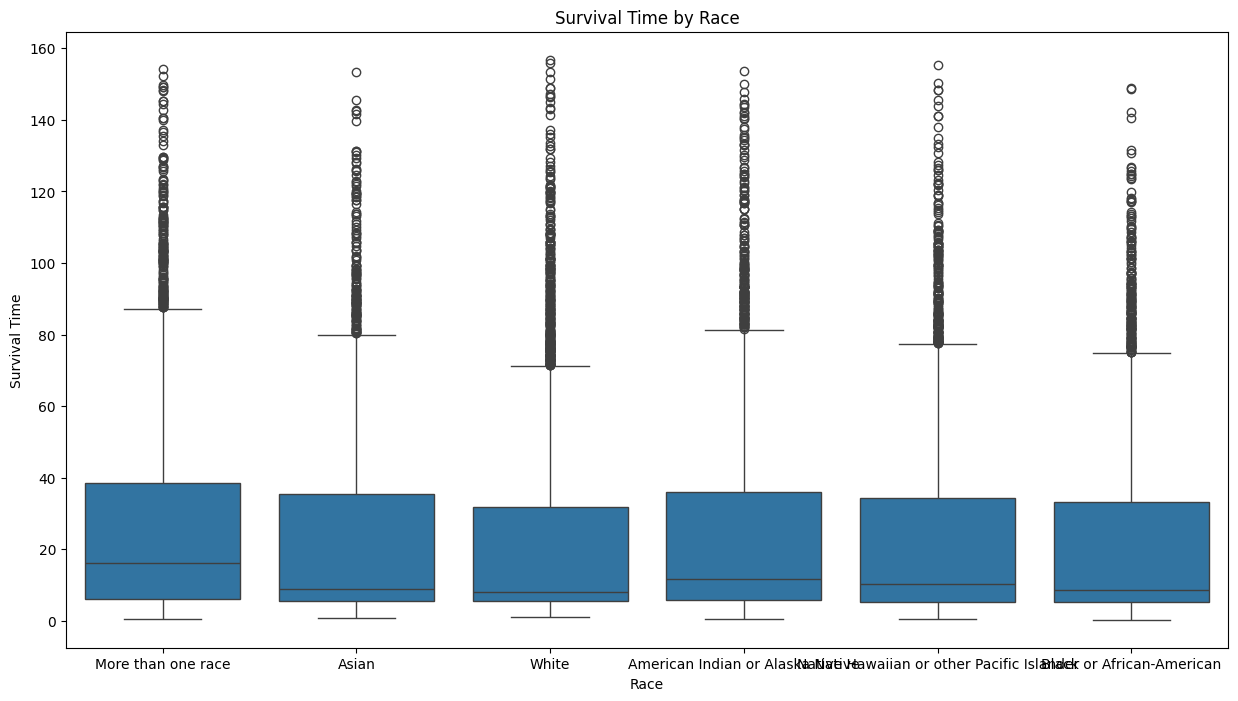

In [12]:
# Boxplot by race group and survival time
plt.figure(figsize=(15, 8))
sns.boxplot(x=df_train["race_group"], y=df_train["efs_time"])
plt.title("Survival Time by Race")
plt.xlabel("Race") 
plt.ylabel("Survival Time")
plt.show() 

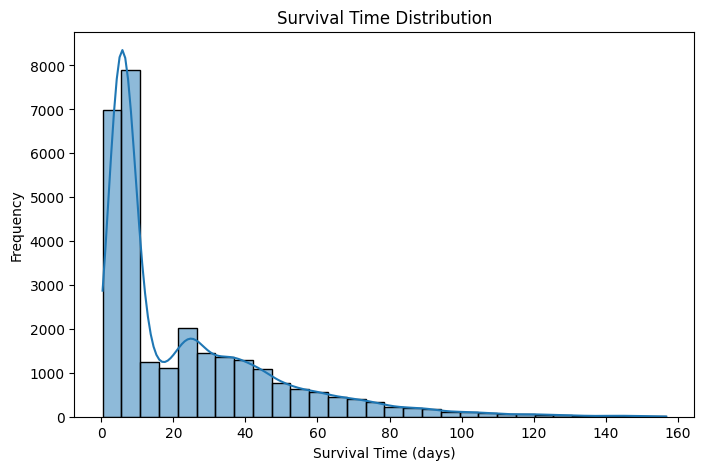

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df_train["efs_time"], bins=30, kde=True)
plt.title("Survival Time Distribution")
plt.xlabel("Survival Time (days)")
plt.ylabel("Frequency")
plt.show()


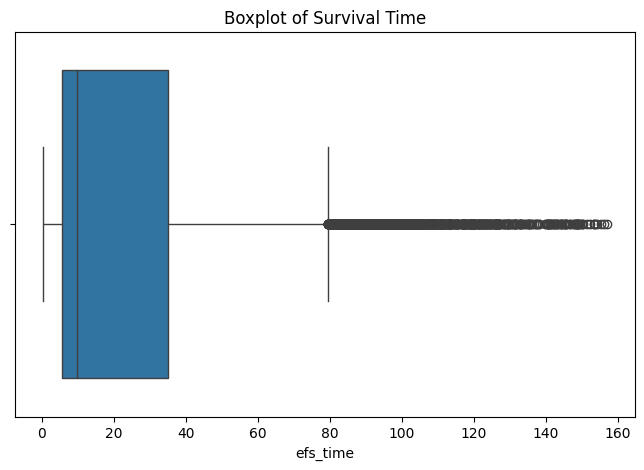

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_train["efs_time"])
plt.title("Boxplot of Survival Time")
plt.show()



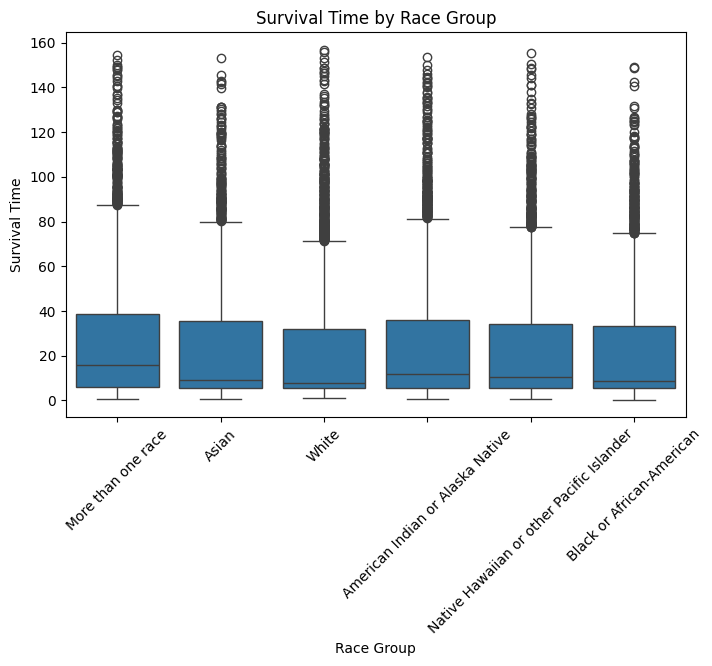

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_train["race_group"], y=df_train["efs_time"])
plt.title("Survival Time by Race Group")
plt.xlabel("Race Group")
plt.ylabel("Survival Time")
plt.xticks(rotation=45)
plt.show()


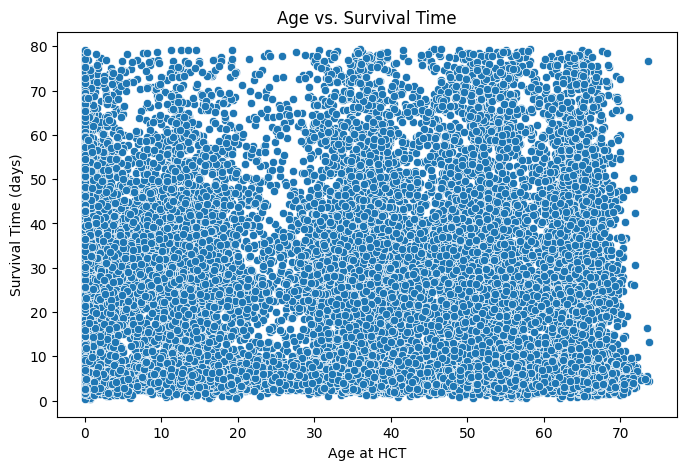

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_train["age_at_hct"], y=df_train["efs_time"])
plt.title("Age vs. Survival Time")
plt.xlabel("Age at HCT")
plt.ylabel("Survival Time (days)")
plt.show() 


In [13]:
 #Outliers (for df_train only)
# IQR Method
Q1 = df_train["efs_time"].quantile(0.25)
Q3 = df_train["efs_time"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter df_train outlier only
df_train = df_train[(df_train["efs_time"] >= lower_bound) & (df_train["efs_time"] <= upper_bound)]

print(f"✅ df_train shape after outlier removal: {df_train.shape}")




✅ df_train shape after outlier removal: (27646, 60)


In [15]:
#One-Hot Encoding (Categorical Features)
# One-Hot Encoding Columns
one_hot_cols = ['graft_type', 'cmv_status', 'sex_match', 'race_group']

# Apply to df_train and df_test
df_train = pd.get_dummies(df_train, columns=[col for col in one_hot_cols if col in df_train.columns])
df_test = pd.get_dummies(df_test, columns=[col for col in one_hot_cols if col in df_test.columns])

print("✅ One-Hot Encoding Done!")


✅ One-Hot Encoding Done!


In [16]:
#Label Encoding (Category columns that require label encoding)
#Columns to encode labels
label_cols = ['cyto_score', 'tce_match', 'conditioning_intensity']

# Label Encoding Apply করুন
le = LabelEncoder()
for col in label_cols:
    if col in df_train.columns and col in df_test.columns:
        df_train[col] = le.fit_transform(df_train[col])
        df_test[col] = le.transform(df_test[col])

print("✅ Label Encoding Done!")

from sklearn.preprocessing import LabelEncoder

categorical_cols = df_train.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for col in categorical_cols:
    df_train[col] = label_encoder.fit_transform(df_train[col].astype(str))
    df_test[col] = label_encoder.transform(df_test[col].astype(str))  # Apply to test set as well


✅ Label Encoding Done!


In [17]:
#Standard Scaling  (Numerical Features)
scaler = StandardScaler()

# Ensure num_features exist in df_test 
valid_num_features = [col for col in num_features if col in df_test.columns]

# Scaling Apply
df_train[valid_num_features] = scaler.fit_transform(df_train[valid_num_features])
df_test[valid_num_features] = scaler.transform(df_test[valid_num_features])

print("✅ Standard Scaling Done!")



✅ Standard Scaling Done!


In [18]:
#df_train or  df_test- Column Structure Match
## Ensure df_train & df_test have same columns
df_train, df_test = df_train.align(df_test, join="left", axis=1)

# Fill missing columns in df_test with 0
df_test.fillna(0, inplace=True)

print(f"✅ df_train shape: {df_train.shape}")
print(f"✅ df_test shape: {df_test.shape}")



✅ df_train shape: (27646, 72)
✅ df_test shape: (3, 72)


In [19]:
#Train-Test Split  
# Define Features (X) and Target (y)
X = df_train.drop(columns=['efs_time', 'ID'])  
y = df_train['efs_time']

# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")


✅ X_train shape: (22116, 70), X_test shape: (5530, 70)


In [20]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_train = onehot_encoder.fit_transform(df_train[categorical_cols])
encoded_test = onehot_encoder.transform(df_test[categorical_cols])

# Convert One-hot encoded arrays to DataFrames
encoded_train_df = pd.DataFrame(encoded_train, columns=onehot_encoder.get_feature_names_out(categorical_cols))
encoded_test_df = pd.DataFrame(encoded_test, columns=onehot_encoder.get_feature_names_out(categorical_cols))

# Add One-Hot Encoded calls by omitting category calls from the main DataFrame
df_train = df_train.drop(columns=categorical_cols).reset_index(drop=True)
df_test = df_test.drop(columns=categorical_cols).reset_index(drop=True)

df_train = pd.concat([df_train, encoded_train_df], axis=1)
df_test = pd.concat([df_test, encoded_test_df], axis=1)



In [21]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor(n_estimators=200, max_depth=5, random_state=42, enable_categorical=True)
model_xgb.fit(X_train, y_train)
import xgboost as xgb

from sklearn.preprocessing import LabelEncoder 
# Categorical Features Encoding (Label Encoding)
categorical_cols = df_train.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for col in categorical_cols:
    df_train[col] = label_encoder.fit_transform(df_train[col].astype(str))
    df_test[col] = label_encoder.transform(df_test[col].astype(str))

# XGBoost model with encoded categorical data
model_xgb = xgb.XGBRegressor(n_estimators=200, max_depth=5, random_state=42)
model_xgb.fit(X_train, y_train)

# Predictions
y_train_pred_xgb = model_xgb.predict(X_train)
y_test_pred_xgb = model_xgb.predict(X_test)



In [ ]:
from sklearn.model_selection import GridSearchCV

# XGBoost model
model_xgb = xgb.XGBRegressor(random_state=42)

# Hyperparameter Grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.3],
    'min_child_weight': [1, 2, 3]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, 
                           cv=3, scoring='neg_mean_squared_error', 
                           verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score 

# Best parameters found
print("Best parameters found:", grid_search.best_params_)

# Fit the model with best parameters
best_model = grid_search.best_estimator_
y_train_pred_xgb = best_model.predict(X_train)
y_test_pred_xgb = best_model.predict(X_test)

# Evaluation
train_mse_xgb = mean_squared_error(y_train, y_train_pred_xgb)
test_mse_xgb = mean_squared_error(y_test, y_test_pred_xgb)
train_r2_xgb = r2_score(y_train, y_train_pred_xgb)
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)

print("Train Mean Squared Error (XGB):", train_mse_xgb)
print("Test Mean Squared Error (XGB):", test_mse_xgb)
print("Train R^2 Score (XGB):", train_r2_xgb)
print("Test R^2 Score (XGB):", test_r2_xgb)






Fitting 3 folds for each of 2916 candidates, totalling 8748 fits
Best parameters found: {'colsample_bytree': 0.9, 'gamma': 0.3, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 500, 'subsample': 0.8}
Train Mean Squared Error (XGB): 12.659963603279108
Test Mean Squared Error (XGB): 39.61676122594419
Train R^2 Score (XGB): 0.9659342087736743
Test R^2 Score (XGB): 0.8915749006585851
Train Mean Squared Error (XGB): 12.659963603279108
Test Mean Squared Error (XGB): 39.61676122594419
Train R^2 Score (XGB): 0.9659342087736743
Test R^2 Score (XGB): 0.8915749006585851


In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# XGBoost model
model_xgb = xgb.XGBRegressor(n_estimators=200, max_depth=5, random_state=42)

# Cross-validation (5-fold)
cv_scores = cross_val_score(model_xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Mean of cross-validation scores (convert negative MSE to positive)
mean_cv_score = -cv_scores.mean()

print("Mean Cross-Validation Score (MSE):", mean_cv_score)



Mean Cross-Validation Score (MSE): 42.98838291669178


In [ ]:
import pandas as pd

# Make sure the ID column is OK
submission = pd.DataFrame({
    "ID": X_test.index,  # If X_test has index ID
    "prediction": y_test_pred_xgb  # Prediction Value
})

# CSV file save
submission.to_csv("submission.csv", index=False)

print("✅ Submission file saved successfully!") 


✅ Submission file saved successfully!
